<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


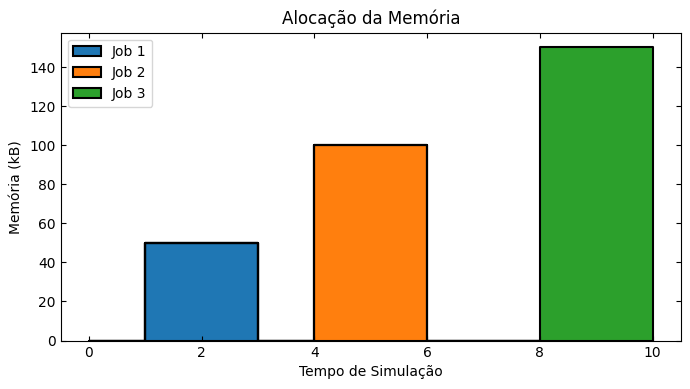

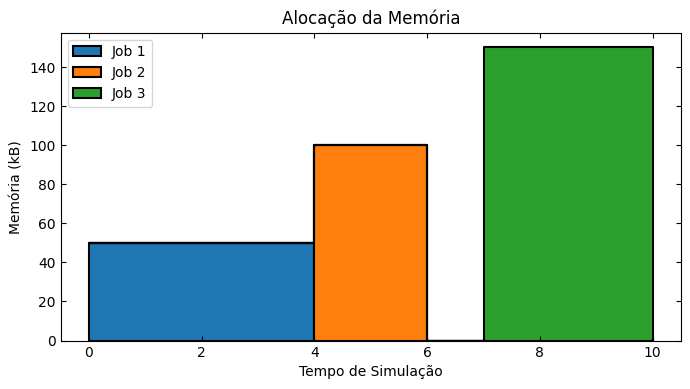

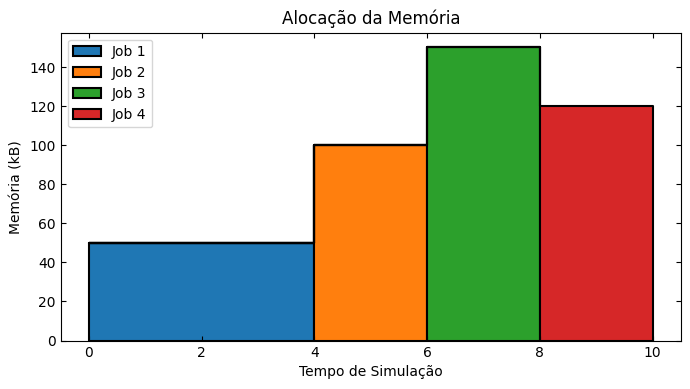

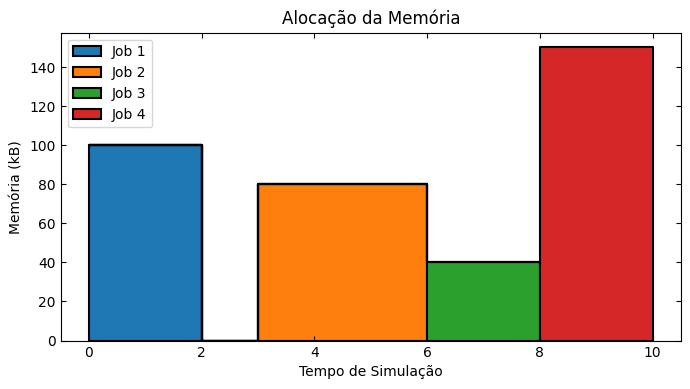

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

alt.renderers.enable('jupyterlab')
alt.themes.enable('excel')

def plot(jobs: list, save_path = None):
  df = pd.DataFrame(jobs)
  df['opacity'] = np.where(df['status'] == 'execução', 1.0, 0.8)
  
  color_domain = ['execução', 'espera']
  color_range = ['#1f77b4', '#d62728']

  bars = alt.Chart(df).mark_bar().encode(
    x=alt.X('start_time').title('Tempo de simulação'),
    x2='end_time',
    y=alt.Y('name').title('Job'),
    color=alt.Color('status').scale(domain=color_domain, range=color_range),
    # opacity=alt.Opacity('opacity', legend=None),
  )
  # .properties(
  #   width=400,
  #   height=100
  # )
  
  text = alt.Chart(df).mark_text(dx=-30, dy=0, color='white').encode(
    x=alt.X('end_time'),
    y=alt.Y('name'),
    detail='status',
    text=alt.Text('status'),
  )
  
  fig =  bars + text
  fig.display()
  
  if save_path:
    fig.save(save_path, scale_factor=3, engine='vl-convert', ppi=800)
  
  return fig


def plot_memory(jobs: list, save_path = None):
  df_meta = pd.DataFrame(jobs)
  max_time = df_meta.end_time.max() + 1
  fig, ax = plt.subplots(figsize=(8, 4))
  
  mem_values = []
  labels = []
  
  for job in jobs:
    if job['status'] == 'execução':
      mem = np.zeros(max_time)
      mem[job['start_time'] : job['end_time']] = job['memory']
      mem_values.append(mem)
      labels.append(job['name'])
  
  plt.stackplot(range(max_time), *mem_values, step='post', labels=labels, edgecolor='k', linewidth=1.5)
  plt.legend(loc='upper left')
  plt.xlabel('Tempo de Simulação')
  plt.ylabel('Memória (kB)')
  # plt.grid(True, axis='y', color='#a1a1a1', linewidth=0.6, linestyle='--', alpha=0.4)
  plt.tick_params('both', right=True, top=True, direction='in')
  plt.title('Alocação da Memória')
  
  plt.savefig(save_path, pad_inches=0.05, bbox_inches='tight')
  plt.plot()
  
  
jobs1 = [
  {
    'start_time': 1,
    'end_time': 3,
    'name': 'Job 1',
    'memory': 50,
    'status': 'execução',
  },
  {
    'start_time': 4,
    'end_time': 6,
    'name': 'Job 2',
    'memory': 100,
    'status': 'execução',
  },
  {
    'start_time': 8,
    'end_time': 10,
    'name': 'Job 3',
    'memory': 150,
    'status': 'execução',
  },
]

jobs2 = [
  {
    'start_time': 0,
    'end_time': 4,
    'name': 'Job 1',
    'memory': 50,
    'status': 'execução',
  },
  {
    'start_time': 1,
    'end_time': 4,
    'name': 'Job 2',
    'memory': 100,
    'status': 'espera',
  },
  {
    'start_time': 4,
    'end_time': 6,
    'name': 'Job 2',
    'memory': 100,
    'status': 'execução',
  },
  {
    'start_time': 7,
    'end_time': 10,
    'name': 'Job 3',
    'memory': 150,
    'status': 'execução',
  }
]

jobs3 = [
  {
    'start_time': 0,
    'end_time': 4,
    'name': 'Job 1',
    'memory': 50,
    'status': 'execução',
  },
  {
    'start_time': 1,
    'end_time': 4,
    'name': 'Job 2',
    'memory': 100,
    'status': 'espera',
  },
  {
    'start_time': 4,
    'end_time': 6,
    'name': 'Job 2',
    'memory': 100,
    'status': 'execução',
  },
  {
    'start_time': 3,
    'end_time': 6,
    'name': 'Job 3',
    'memory': 150,
    'status': 'espera',
  },
  {
    'start_time': 6,
    'end_time': 8,
    'name': 'Job 3',
    'memory': 150,
    'status': 'execução',
  },
  {
    'start_time': 5,
    'end_time': 8,
    'name': 'Job 4',
    'memory': 120,
    'status': 'espera',
  },
  {
    'start_time': 8,
    'end_time': 10,
    'name': 'Job 4',
    'memory': 120,
    'status': 'execução',
  }
]

jobs4 = [
  {
    'start_time': 0,
    'end_time': 2,
    'name': 'Job 1',
    'memory': 100,
    'status': 'execução',
  },
  {
    'start_time': 3,
    'end_time': 6,
    'name': 'Job 2',
    'memory': 80,
    'status': 'execução',
  },
  {
    'start_time': 3,
    'end_time': 6,
    'name': 'Job 3',
    'memory': 40,
    'status': 'espera',
  },
  {
    'start_time': 6,
    'end_time': 8,
    'name': 'Job 3',
    'memory': 40,
    'status': 'execução',
  },
  {
    'start_time': 3,
    'end_time': 8,
    'name': 'Job 4',
    'memory': 150,
    'status': 'espera',
  },
  {
    'start_time': 8,
    'end_time': 10,
    'name': 'Job 4',
    'memory': 150,
    'status': 'execução',
  }
]

tests = (jobs1, jobs2, jobs3, jobs4)

for i, jobs in enumerate(tests, 1):
  plot(jobs, save_path=f'plots/exec_{i}.png')
  plot_memory(jobs, save_path=f'plots/mem_{i}.pdf')

In [57]:
alt.themes

ThemeRegistry(active='default', registered=['dark', 'default', 'excel', 'fivethirtyeight', 'ggplot2', 'googlecharts', 'latimes', 'none', 'opaque', 'powerbi', 'quartz', 'urbaninstitute', 'vox'])